### sigmoid 함수  
y = 1 / (1 + e<sup>-x</sup>)  
- x값이 뭐가 들어가든 y값은 0에서 1 사이의 값으로 나온다  

In [6]:
# 시그모이드 함수 
import numpy as np
import matplotlib.pyplot as plt

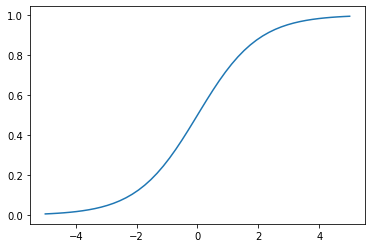

In [4]:
def sigmoid_function(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-5, 5)
y = sigmoid_function(x)

plt.plot(x, y)
plt.show()

- y<sup>'</sup> = (1 - y) * y

### tanh  
y = (e<sup>x</sup> - e<sup>-x</sup>) / (e<sup>x</sup> + e<sup>-x</sup>)  
- sigmoid 함수와 비슷하지만 y값이 -1과 1 사이에 존재

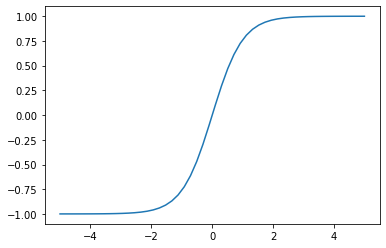

In [5]:
def tanh_function(x):
    return np.tanh(x)

x = np.linspace(-5, 5)
y = tanh_function(x)

plt.plot(x, y)
plt.show()

### ReLU(Rectified Linear Unit)  

y = if x <= 0 then 0 else x  
- 음수부터 0까지는 몽땅0, 나머지는 y = x

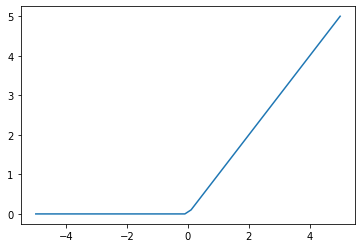

In [6]:
def relu_function(x):
    return np.where(x <= 0, 0, x)

x = np.linspace(-5, 5)
y = relu_function(x)

plt.plot(x, y)
plt.show()

### Leaky ReLU  
y = if x <= 0 then 0.01x else x  
- x가 음수인 영역에서 아주 작은 기울기를 생성  
- 출력이 0이 되어 더 이상 학습이 진행되지 않는 뉴런이 발생하는 dying ReLU 현상을 피하기 위해 사용

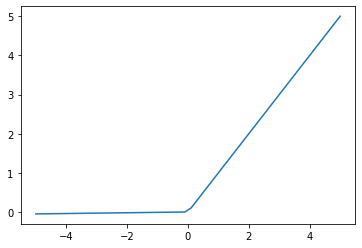

In [7]:
def leaky_relu_function(x):
    return np.where(x <= 0, 0.01*x, x)

x = np.linspace(-5, 5)
y = leaky_relu_function(x)

plt.plot(x, y)
plt.show()

### Softmax
- 입력받은 값을 출력으로 0 ~ 1 사이의 값으로 모두 정규화  
- 출력 값들의 총합은 항상 1  
![softmax](img/softmax.png)

In [9]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

y = softmax_function(np.array([1, 2, 3]))
print(y)

[0.09003057 0.24472847 0.66524096]


## 신경망
![neuron](img/neuron.png)  
- Dendrite : 수상돌기  
- Axon:축삭돌기
![neuronmodel](img/neuron모델.png) 

### 단일 신경망 구축  
- 딥러닝에서 가중치(w)와 bias(b)는 임의의 수로 설정 후 학습하는 과정에서 갱신함  
- 지금은 가중치와 bias를 고정하고, 이 값들이 실제 신경망 출력에 어떤 의미를 가지는지 확인함  
- 입력으로 단 두 개의 값(feature) x<sub>1</sub>, x<sub>2</sub>  
- 활성화 함수로 sigmoid 함수 사용  

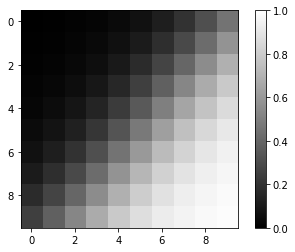

In [19]:
# 가중치가 변하면 최종 activate 출력값이 변함
# feature가 수십개면 가중치도 수십개
x1 = np.arange(-1.0, 1.0, 0.2)
x2 = np.arange(-1.0, 1.0, 0.2)

w_x1 = 2.5
w_x2 = 3.0

for i in range(10):
    for j in range(10):
        u = (x1[i]*w_x1 + x2[j]*w_x2)  + bias
        y = 1/(1+ np.exp(-u))
        Z[i][j] = y
        
plt.imshow(Z, 'gray',  vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

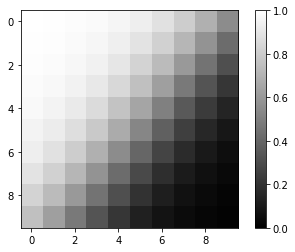

In [20]:
# 위와 같은 코드 

x1 = np.arange(-1.0, 1.0, 0.2)
x2 = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10, 10))

w_x1 = 2.5
w_x2 = 3.0
W = np.array([-2.5, -3.0])

bias = np.array([0.1])

for i in range(10):
    for j in range(10):
        list1 = [x1[i], x2[j]]
        X = np.array(list1)
        u = np.dot(X, W.T) + bias
        y = 1/(1 + np.exp(-u))
        Z[i][j] = y
        
plt.imshow(Z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

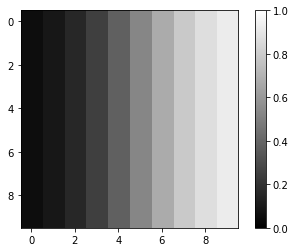

In [21]:
# 가중치 0 ~ 3 으로 변경

x1 = np.arange(-1.0, 1.0, 0.2)
x2 = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10,10))

W = np.array([0.0,3.0])

bias = np.array([0.1])


for i in range(10):
    for j in range(10):
        list1 = [x1[i],x2[j]]
        X=np.array(list1)
        u = np.dot(X,W.T) + bias
        y = 1/(1+ np.exp(-u))
        Z[i][j] = y
        
plt.imshow(Z, 'gray',  vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

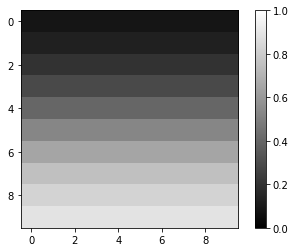

In [25]:
# 가중치 2.5 ~ 0 으로 변경

x1 = np.arange(-1.0, 1.0, 0.2)
x2 = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10,10))

W = np.array([2.5,0.0])

bias = np.array([0.1])


for i in range(10):
    for j in range(10):
        list1 = [x1[i],x2[j]]
        X=np.array(list1)
        u = np.dot(X,W.T) + bias
        y = 1/(1+ np.exp(-u))
        Z[i][j] = y
        
plt.imshow(Z, 'gray',  vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

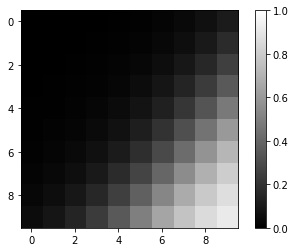

In [23]:
# 바이어스 값 -2로 변경

x1 = np.arange(-1.0, 1.0, 0.2)
x2 = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10,10))

W = np.array([2.5,3.0])

bias = np.array([-2.0])


for i in range(10):
    for j in range(10):
        list1 = [x1[i],x2[j]]
        X=np.array(list1)
        u = np.dot(X,W.T) + bias
        y = 1/(1+ np.exp(-u))
        Z[i][j] = y
        
plt.imshow(Z, 'gray',  vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

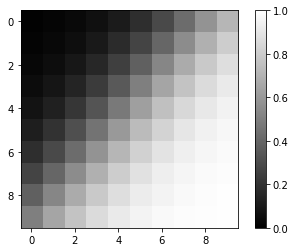

In [26]:
# 바이어스 값 1로 변경
x1 = np.arange(-1.0, 1.0, 0.2)
x2 = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10,10))

W = np.array([2.5,3.0])

bias = np.array([1.0])


for i in range(10):
    for j in range(10):
        list1 = [x1[i],x2[j]]
        X=np.array(list1)
        u = np.dot(X,W.T) + bias
        y = 1/(1+ np.exp(-u))
        Z[i][j] = y
        
plt.imshow(Z, 'gray',  vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

## 다중신경망  
- Input Layer 입력 2개, Hidden Layer 노드 2개, Output Layer노드 1개  
- Hidden Layer 상의 활성화함수 시그모이드 사용  
- Output Layer 활성화함수 항등함수(y=x) 사용

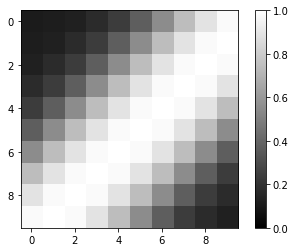

In [9]:
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

# 출력 저장하는 변수
Z = np.zeros((10,10))

# 가중치 2개 필요(입력층 -> 은닉층, 은닉층 -> 출력층)
w_im = np.array([[4.0, 4.0], [4.0, 4.0]])  # 2차원 배열 -> 출력은 열의 갯수만큼 나옴
w_mo = np.array([[1.0], [-1.0]]) # 은닉층에서 출력으로 갈 때의 가중치

# 각각의 bias
b_im = np.array([3.0, -3.0])
b_mo = np.array([0.1])

# 층 설계하기
# Hidden Layer
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u)) # 활성화함수 시그모이드 함수

# Output Layer 설계하기
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u # 활성화함수 항등함수

for i in range(10):
    for j in range(10):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[j][i] = out[0]
        
        
# 그려보기
plt.imshow(Z, 'gray',  vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

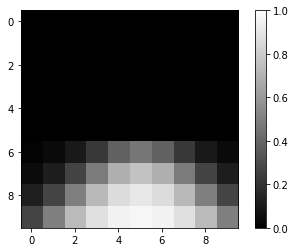

In [11]:
# 가중치와 바이어스 값 바꿔보기

X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

w_im = np.array([[-5.0,-5.0], [5.0,-5.0]])
w_mo = np.array([[1.0], [-1.0]])

b_im = np.array([0.0,0.0])
b_mo = np.array([0.0])


def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u)) 

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u 

for i in range(10):
    for j in range(10):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[j][i] = out[0]
        
        

plt.imshow(Z, 'gray',  vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

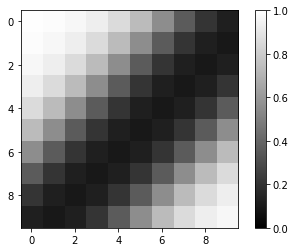

In [12]:
# 가중치와 바이어스 값 바꿔보기

X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

w_im = np.array([[4.0, 4.0], [4.0,4.0]])
w_mo = np.array([[-1.0], [1.0]])

b_im = np.array([3.0,-3.0])
b_mo = np.array([1.0])


def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u)) 

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u 

for i in range(10):
    for j in range(10):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[j][i] = out[0]
        
        

plt.imshow(Z, 'gray',  vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

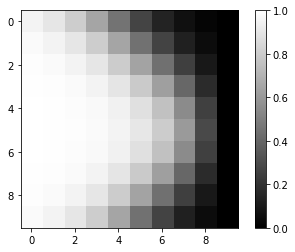

In [13]:
# 가중치와 바이어스 값 바꿔보기

X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)

Z = np.zeros((10,10))

w_im = np.array([[-4.0, 4.0], [-4.0,-4.0]])
w_mo = np.array([[1.0], [-1.0]])

b_im = np.array([3.0,-3.0])
b_mo = np.array([0.0])

def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u)) 

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u 

for i in range(10):
    for j in range(10):
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
        
        Z[j][i] = out[0]
        
        

plt.imshow(Z, 'gray',  vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

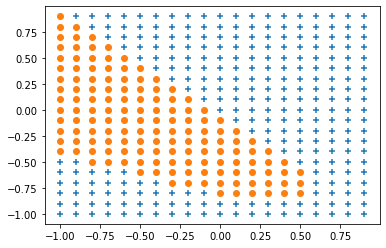

In [17]:
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0, 1.0, 0.1)

# 가중치는 2열 => 출력이 2개짜리 값
w_im = np.array([[1.0, 2.0], [2.0, 3.0]])
w_mo = np.array([[-1.0, 1.0], [1.0, -1.0]])

b_im = np.array([0.3, -0.3])
b_mo = np.array([0.4, 0.1])

# 히든레이어에 시그모이드 활성화함수
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))

# output레이어에 softmax 함수 
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u) / np.sum(np.exp(u))

x_1 = []
y_1 = []
x_2 = []
y_2 = []

for i in range(20):
    for j in range(20):
        
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
#        print(out[0], out[1]) => class가 0일 확률, class가 1일 확률 : 더하면 1
        
        
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
            
plt.scatter(x_1, y_1, marker='+')
plt.scatter(x_2, y_2, marker='o')
plt.show()

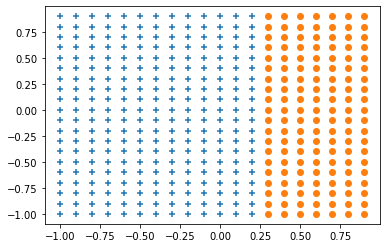

In [18]:
# 가중치 값 바꿔보기
X = np.arange(-1.0, 1.0, 0.1)
Y = np.arange(-1.0, 1.0, 0.1)

w_im = np.array([[2.0, 1.0], [0.0, 3.0]])
w_mo = np.array([[-2.0, 1.0], [-1.0, -1.0]])

# 편향
b_im = np.array([-0.3, -0.3])
b_mo = np.array([0.4, -1.2])


def middle_layer(x, w, b): # sigmoid함수
    u = np.dot(x, w) + b
    return 1 / (1 + np.exp(-u))


def output_layer(x, w, b): #softmax함수
    u = np.dot(x, w) + b
    return np.exp(u) / np.sum(np.exp(u))

x_1 = []
y_1 = []
x_2 = []
y_2 = []

for i in range(20):
    for j in range(20):
        
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)
 
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
            
plt.scatter(x_1, y_1, marker='+')
plt.scatter(x_2, y_2, marker='o')
plt.show()